In [158]:
import numpy as np
#import random
import matplotlib.pyplot as plt

In [194]:
# --- 1. Problem Definition (from your prompt) ---

def Easom(x,y):
    return np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

def fitness_function(xx, yy):
    x1 = (xx-150)/200
    y1 = (yy-150)/200
    z1 = Easom(x1,y1)
    x2 = (xx-150)/200
    y2 = (yy+400)/200
    z2 = Easom(x2,y2)
    x3 = (xx+400)/200
    y3 = (yy+400)/200
    z3 = Easom(x3,y3)
    x4 = (xx+400)/200
    y4 = (yy-150)/200
    z4 = Easom(x4,y4)
    return z1 + z2 + z3 + z4

# def fitness_function(xx, yy): # 2 targets
#     x1 = (xx-500)/100
#     y1 = (yy-500)/100
#     z1 = Easom(x1,y1)
#     x4 = (xx+100)/100
#     y4 = (yy+100)/100
#     z4 = Easom(x4,y4)
#     return z1 + z4

# def fitness_function(xx, yy):
#     x1 = (xx-150)/200
#     y1 = (yy-150)/200
#     z1 = Easom(x1,y1)
#     x3 = (xx+400)/200
#     y3 = (yy+400)/200
#     z3 = Easom(x3,y3)
#     return z1 + z3

In [187]:
# Distance function
def distance(xi, xj):
    return np.linalg.norm(xi - xj)

In [188]:
def transmission_function(x, TR):
    if x<= TR:
        return 1
    else:
        return 0

In [200]:
# --- 2. Algorithm Parameters ---
n_fireflies = 49
max_iter = 100
alpha = 0.2        # Randomness
beta0 = 1          # Base attractiveness
gamma = 0.001      # Absorption coefficient
lb, ub = 0, 1000   # Bounds for x and y
TR = 200           # Transmission range

In [201]:
# def starting_points(num_worms):
#     """Initialize the worm positions randomly."""
#     return np.random.rand(num_worms, 2) * dims

def starting_points(n_fireflies):
    """Evenly distribute particles on a grid within the search space."""
    list_glowworm = []
    start = 0.05 * ub
    end = 0.95 * ub
    
    # Determine the number of rows and columns based on the number of particles
    n_side = int(np.ceil(np.sqrt(n_fireflies)))  # Number of rows and columns in the grid
    x_coords = np.linspace(start, end, n_side)
    y_coords = np.linspace(start, end, n_side)

    # Create particles and assign grid positions
    for i in range(n_fireflies):
        # Calculate grid coordinates (i.e., row and column)
        row = i // n_side
        col = i % n_side
        grid_position = np.array([x_coords[col], y_coords[row]])  # Assign grid position
        list_glowworm.append(grid_position)
    
    return np.array(list_glowworm)

In [202]:
# Initialize fireflies
#fireflies = np.random.uniform(lb, ub, (n_fireflies, 2))
fireflies = starting_points(n_fireflies)
all_positions = [fireflies.copy()]
intensities = np.array([fitness_function(x, y) for x, y in fireflies])

In [203]:
# --- 4. Modified Firefly Algorithm Main Loop ---

# Main optimization loop
for t in range(max_iter):
    for i in range(n_fireflies):
        for j in range(n_fireflies):
            if intensities[j] > intensities[i]:
                r = distance(fireflies[i], fireflies[j])
                beta = beta0 * transmission_function(r, TR)
                rand = np.random.uniform(-0.5, 0.5, size=2)
                fireflies[i] += beta * (fireflies[j] - fireflies[i]) + alpha * rand
                fireflies[i] = np.clip(fireflies[i], lb, ub)
                intensities[i] = fitness_function(fireflies[i][0], fireflies[i][1])
    all_positions.append(fireflies.copy())

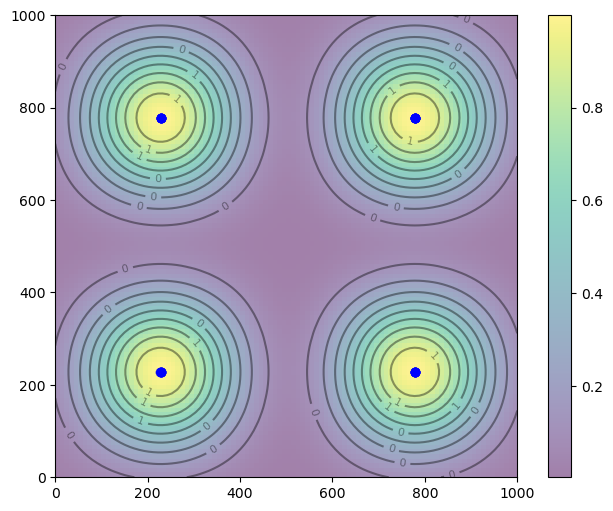

In [204]:
# Plotting - no Animation
x, y = np.array(np.meshgrid(np.linspace(lb, ub, 100), np.linspace(lb, ub, 100)))
z = fitness_function(x, y)

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(z, extent=[lb, ub, lb, ub], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

i = 100
ax.clear()
ax.imshow(z, extent=[lb, ub, lb, ub], origin='lower', cmap='viridis', alpha=0.5)
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
x_list = []
y_list = []
for j in range(n_fireflies):
    x_list.append(all_positions[i][j][0])
    y_list.append(all_positions[i][j][1])
p_plot = ax.scatter(x_list, y_list, marker='o', color='blue', alpha=0.5)
plt.show()

In [205]:
finalPositions = all_positions[-1]
ll = []
for j in range(n_fireflies):
    ll.append([finalPositions[j][0],finalPositions[j][1]])

clusters_num = 4
# clusters = np.array([[228.3,228.3],[778.3,778.3]]) # 2 clusters
clusters = np.array([[228.3,228.3],[778.3,228.3],[228.3,778.3],[778.3,778.3]]) # 2 clusters
# clusters = np.array([[214.15,214.15],[814.15,814.15]]) # 2 clusters
# clusters = np.array([[214.15,214.15],[214.15,514.15],[214.15,814.15],
#                      [514.15,214.15],[514.15,514.15],[514.15,814.15],
#                      [814.15,214.15],[814.15,514.15],[814.15,814.15]]) # 9 clusters
cluster_count = np.zeros(clusters_num)
radius = 50
for i in ll:
    for j in range(clusters_num):
        if np.linalg.norm(clusters[j]-i) <= radius:
            cluster_count[j] = cluster_count[j] + 1
print(clusters)
print(cluster_count)
print(sum(cluster_count))

[[228.3 228.3]
 [778.3 228.3]
 [228.3 778.3]
 [778.3 778.3]]
[11. 12. 12. 14.]
49.0
